In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from plotutils import *
rc('text', usetex=True)

In [2]:
# date = '09_19_2021'
# tol = 1e-6
date = '09_27_2021'
tol = 1e-5

In [3]:
schimdt = get_all(logdir='../IPG/test/log', date=[date], inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
schimdt_time = collect_time(schimdt)

schimdt-1.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-10.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-100.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
schimdt-1000.0
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  1
schimdt-10000.0
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  1


In [4]:
lee = get_all(logdir='../IPG/test/log', date=[date], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
lee_time = collect_time(lee)

lee-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.2
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.3
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
lee-0.4
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
lee-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


In [5]:
# there is bug in yd impl so I rerun this set
yd = get_all(logdir='../IPG/test/log', date=['09_30_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
yd_time = collect_time(yd)

yd-0.1
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.2
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
yd-0.3
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4
yd-0.4
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4
yd-0.5
 70/72 instances terminate with status:  0
  2/72 instances terminate with status:  4


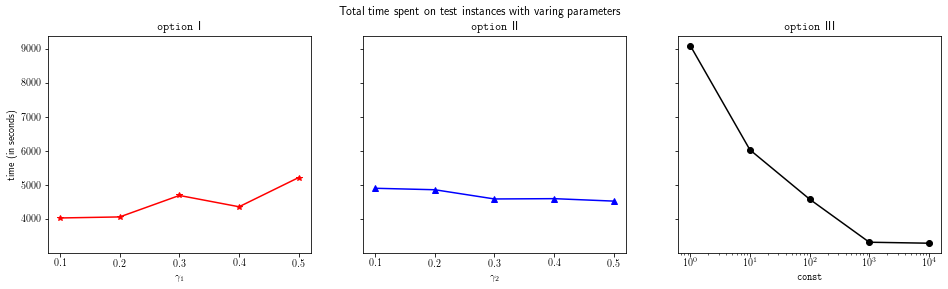

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Total time spent on test instances with varing parameters')
ax1.plot([0.1, 0.2, 0.3, 0.4, 0.5], yd_time, 'r-*')
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.plot([0.1, 0.2, 0.3, 0.4, 0.5], lee_time, 'b-^')
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_title(r'\texttt{option} II')
ax3.plot([1e0, 1e1, 1e2, 1e3, 1e4], schimdt_time, 'k-o')
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xscale('log')
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_sensitivity.pdf", dpi=300)

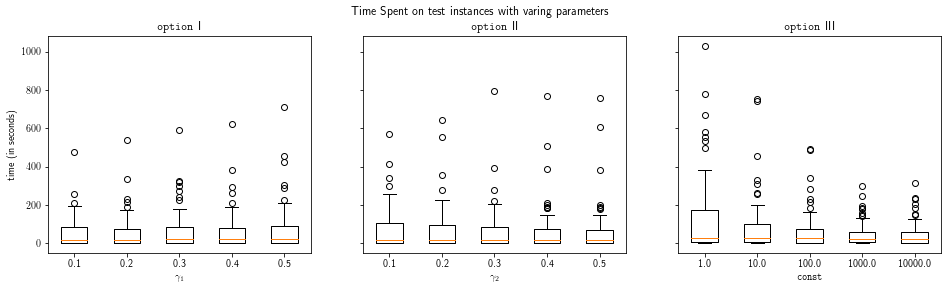

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
fig.suptitle('Time Spent on test instances with varing parameters')
ax1.boxplot(prepare_box(yd))
ax1.set_xlabel(r'$\gamma_1$')
ax1.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax1.set_ylabel('time (in seconds)')
ax1.set_title(r'\texttt{option} I')
ax2.boxplot(prepare_box(lee))
ax2.set_xlabel(r'$\gamma_2$')
ax2.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
ax2.set_title(r'\texttt{option} II')
ax3.boxplot(prepare_box(schimdt))
ax3.set_xlabel(r'\texttt{const}')
ax3.set_xticklabels([1e0, 1e1, 1e2, 1e3, 1e4])
ax3.set_title(r'\texttt{option} III')
fig.savefig("./natOG/paramter_hist.pdf", dpi=300)

## Morales Plots

In [8]:
# schimdt = get_all(logdir='../IPG/test/log', date=date, inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[1e0, 1e1, 1e2, 1e3, 1e4])
ppf = PerformanceProfile(schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: schimdt-1000.0


In [9]:
# lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(lee)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
lee_best = get_best(pools)
print('Best params:', lee_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: lee-0.5


In [10]:
# yd = get_all(logdir='../IPG/test/log', date=date, inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(yd)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
yd_best = get_best(pools)
print('Best params:', yd_best)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: yd-0.2


In [11]:
cols = ['datasetid', 'F', 'time', 'nz']
schimdt_df = schimdt[schimdt_best][cols].copy()
lee_df = lee[lee_best][cols].copy()
yd_df = yd[yd_best][cols].copy()

def pair_wise_comparison(df1, df2, suffixes_lst):
    df12_merged = pd.merge(df1, df2, on='datasetid', 
                           suffixes=(suffixes_lst[0], suffixes_lst[1]), how='left')
    better12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) > 0 )
    same12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) == 0 ) 
    worse12_z = np.sum((df12_merged[f'nz{suffixes_lst[0]}'] - df12_merged[f'nz{suffixes_lst[1]}']) < 0 ) 
    
    better12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) < -1e-8 )
    same12_F = np.sum(np.abs(df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) <=1e-8 ) 
    worse12_F = np.sum((df12_merged[f'F{suffixes_lst[0]}'] - df12_merged[f'F{suffixes_lst[1]}']) > 1e-8 )     

    print(f"For {suffixes_lst[0]}-{suffixes_lst[1]} comparsion:\n==========================")
    print(" In terms final F:")
    print(f"  better:{better12_F} | same:{same12_F} | worse: {worse12_F}")
    print(" In terms #z:")
    print(f"  better:{better12_z} | same:{same12_z} | worse: {worse12_z}")
    return better12_z, same12_z, worse12_z, better12_F, same12_F, worse12_F

In [12]:
pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

For yd-lee comparsion:
 In terms final F:
  better:0 | same:71 | worse: 1
 In terms #z:
  better:1 | same:67 | worse: 4


(1, 67, 4, 0, 71, 1)

In [13]:
pair_wise_comparison(yd_df, schimdt_df, suffixes_lst=['yd', 'schimdt'])

For yd-schimdt comparsion:
 In terms final F:
  better:4 | same:67 | worse: 1
 In terms #z:
  better:3 | same:69 | worse: 0


(3, 69, 0, 4, 67, 1)

In [14]:
pair_wise_comparison(lee_df, schimdt_df, suffixes_lst=['lee', 'schimdt'])

For lee-schimdt comparsion:
 In terms final F:
  better:4 | same:67 | worse: 1
 In terms #z:
  better:6 | same:65 | worse: 1


(6, 65, 1, 4, 67, 1)

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
yd-0.2 Win:33 | Lose:39
yd-0.2 Win:46 | Lose:26
lee-0.5 Win:43 | Lose:29


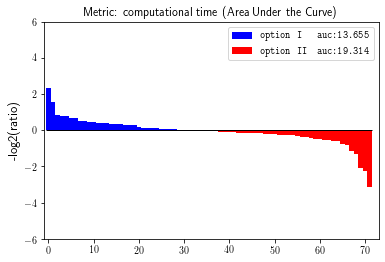

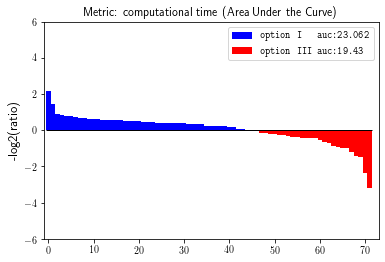

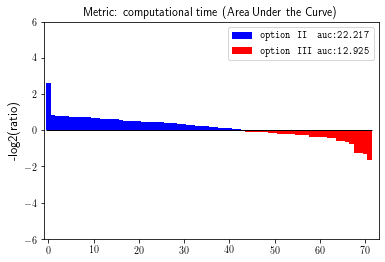

In [83]:
final = {}
final[yd_best] = yd[yd_best]
final[lee_best] = lee[lee_best]
final[schimdt_best] = schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

# Large Scale

In [15]:
tol = 1e-5

In [42]:
schimdt = get_all(logdir='../IPG/test/log', date=['09_27_2021','09_28_2021', '09_29_2021'], inexact_type='schimdt', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[1e3])

schimdt-1000.0
 107/132 instances terminate with status:  0
  16/132 instances terminate with status:  1
   9/132 instances terminate with status:  2


In [43]:
lee = get_all(logdir='../IPG/test/log', date=['09_27_2021','09_28_2021', '09_29_2021'], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.5])

lee-0.5
 107/132 instances terminate with status:  0
   2/132 instances terminate with status:  4
  15/132 instances terminate with status:  1
   8/132 instances terminate with status:  2


In [44]:
yd = get_all(logdir='../IPG/test/log', date=['09_30_2021','09_28_2021', '09_29_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.2])

yd-0.2
 108/132 instances terminate with status:  0
   1/132 instances terminate with status:  4
  16/132 instances terminate with status:  1
   7/132 instances terminate with status:  2


In [45]:
print(schimdt_best, lee_best, yd_best)
cols = ['datasetid', 'F', 'time', 'nz']
schimdt_df = schimdt[schimdt_best][cols].copy()
lee_df = lee[lee_best][cols].copy()
yd_df = yd[yd_best][cols].copy()

schimdt-1000.0 lee-0.5 yd-0.2


In [37]:
pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

For yd-lee comparsion:
 In terms final F:
  better:10 | same:115 | worse: 7
 In terms #z:
  better:4 | same:118 | worse: 10


(4, 118, 10, 10, 115, 7)

In [46]:
pair_wise_comparison(yd_df, schimdt_df, suffixes_lst=['yd', 'schimdt'])

For yd-schimdt comparsion:
 In terms final F:
  better:24 | same:103 | worse: 5
 In terms #z:
  better:5 | same:121 | worse: 6


(5, 121, 6, 24, 103, 5)

In [47]:
pair_wise_comparison(lee_df, schimdt_df, suffixes_lst=['lee', 'schimdt'])

For lee-schimdt comparsion:
 In terms final F:
  better:23 | same:103 | worse: 6
 In terms #z:
  better:8 | same:118 | worse: 6


(8, 118, 6, 23, 103, 6)

All algorithms failed in 7 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 125 instances are kept.
yd-0.2 Win:63 | Lose:62
yd-0.2 Win:65 | Lose:60
lee-0.5 Win:67 | Lose:57


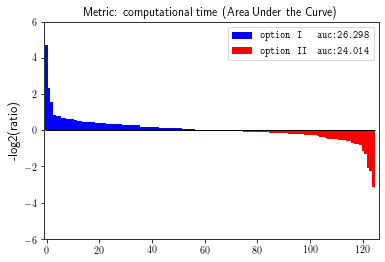

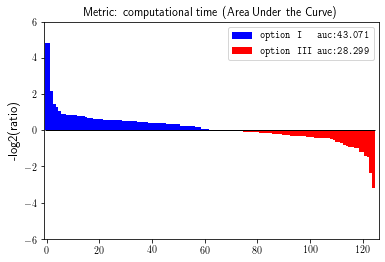

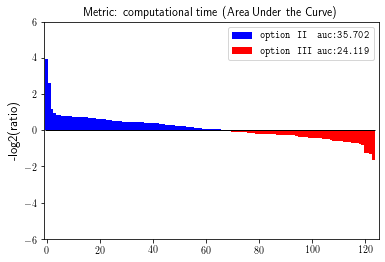

In [51]:
final = {}
final[yd_best] = yd[yd_best]
final[lee_best] = lee[lee_best]
final[schimdt_best] = schimdt[schimdt_best]
ppf = PerformanceProfile(final, failcode=2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])